# *Exercise 4*

In [2]:
from google.colab import drive
drive.mount('/content/drive')     # connecting to google drive

Mounted at /content/drive


# 1. Generate synthetic image with random **blobs**

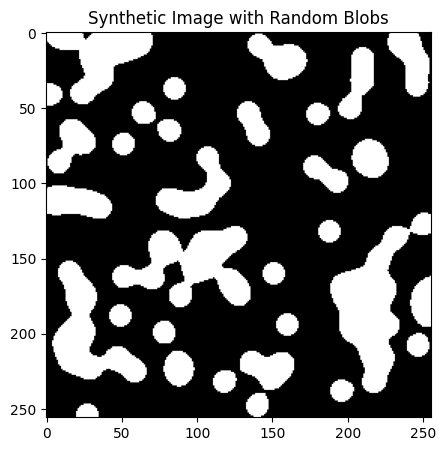

In [7]:


import matplotlib.pyplot as plt
from skimage.data import binary_blobs

# Generate the image
image = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3)

# Show the image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Synthetic Image with Random Blobs')

plt.show()


# **2. Object segmentation and labeling**

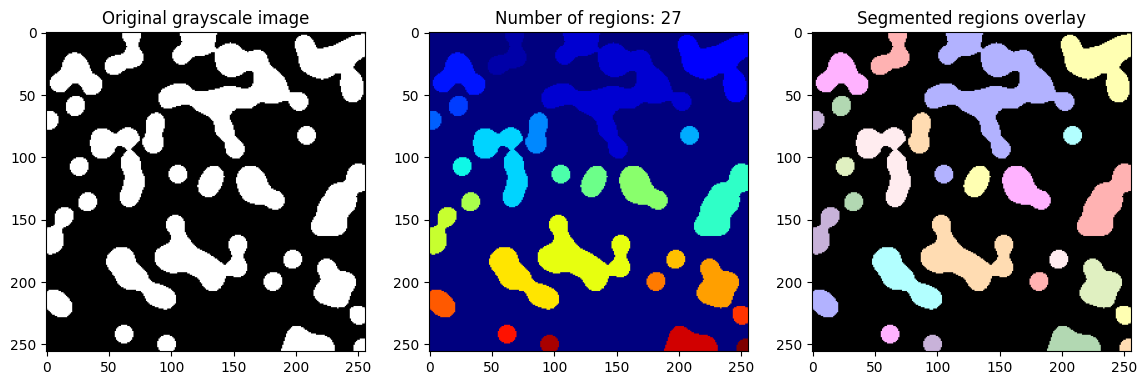

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import binary_blobs
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

IG = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3)

# Otsu
thresh = threshold_otsu(IG)
bw = IG > thresh  # keep lighter regions with grayscale intensities above threshold



label_image, nregions = label(bw, return_num=True)  # Label image regions
image_label_overlay = label2rgb(label_image, image=IG)
fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()

ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')

ax[1].imshow(label_image, cmap=plt.cm.jet)
ax[1].set_title(f'Number of regions: {nregions}')

ax[2].imshow(image_label_overlay, cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')


plt.show()


# **3. Get regional properties in a pandas dataframe**

In [18]:


import pandas as pd
from skimage.measure import regionprops_table

# Extract selected properties
props = regionprops_table(label_image, properties=[
    'label',
    'area',
    'eccentricity',
    'extent',
    'axis_major_length'
])

# Convert to a pandas DataFrame
df = pd.DataFrame(props)

# Show only first 5 rows
df.head()


,label,area,eccentricity,extent,axis_major_length
0,1,613.0,0.836923,0.564977,42.941704
1,2,4293.0,0.607812,0.350735,111.168048
2,3,1793.0,0.714636,0.571930,67.042155
3,4,857.0,0.630993,0.600140,41.601109
4,5,199.0,0.391148,0.829167,16.581921


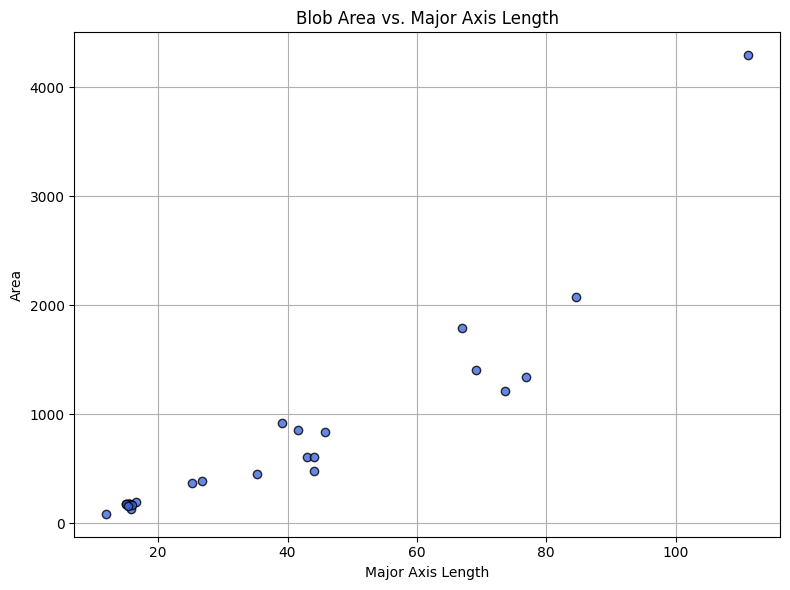

In [19]:
import matplotlib.pyplot as plt


x = df['axis_major_length']  # Extract data from the DataFrame
y = df['area']


plt.figure(figsize=(8, 6))  # scatter plot
plt.scatter(x, y, color='royalblue', edgecolor='k', alpha=0.8)

plt.title('Blob Area vs. Major Axis Length')
plt.xlabel('Major Axis Length')
plt.ylabel('Area')
plt.grid(True)
plt.tight_layout()
plt.show()


# **4. Analyze blobs**

In [20]:
#coverage area
avg_area = df['area'].mean()

# Filter blobs with area above the average
above_avg_blobs = df[df['area'] > avg_area]

# Display the filtered table
above_avg_blobs


,label,area,eccentricity,extent,axis_major_length
1,2,4293.0,0.607812,0.350735,111.168048
2,3,1793.0,0.714636,0.571930,67.042155
3,4,857.0,0.630993,0.600140,41.601109
8,9,1347.0,0.882933,0.478338,76.907917
10,11,1404.0,0.919131,0.550157,69.137023
13,14,837.0,0.842038,0.613187,45.742981
16,17,2074.0,0.827439,0.459459,84.571383
17,18,1212.0,0.947635,0.432857,73.648552
19,20,919.0,0.578093,0.675735,39.103823


In [25]:
# avg area
avg_area = df['area'].mean()

# Filtering blobs
large_blobs = df[df['area'] >= avg_area]

# result
print(f"There are {len(large_blobs)} blobs with an area greater than or equal to the average area ({avg_area:.2f})")




There are 9 blobs with an area greater than or equal to the average area (728.19)


# Representing blobs with area smaller than *avg*

In [24]:
#  avg area
avg_area = df['area'].mean()

# Filtering blobs
small_blobs = df[df['area'] < avg_area]

print(f"There are {len(small_blobs)} blobs with an area smaller than the average area ({avg_area:.2f})")




There are 18 blobs with an area smaller than the average area (728.19)


# Label of large and small blobs

In [26]:

avg_area = df['area'].mean()

# small and large blobs
small_blobs = df[df['area'] < avg_area]['label'].values
large_blobs = df[df['area'] >= avg_area]['label'].values
print("labels of small blobs:", list(small_blobs))
print("labels of large blobs:", list(large_blobs))


labels of small blobs: [np.int64(1), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(12), np.int64(13), np.int64(15), np.int64(16), np.int64(19), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27)]
labels of large blobs: [np.int64(2), np.int64(3), np.int64(4), np.int64(9), np.int64(11), np.int64(14), np.int64(17), np.int64(18), np.int64(20)]


# Binary mask for lange and small blobs

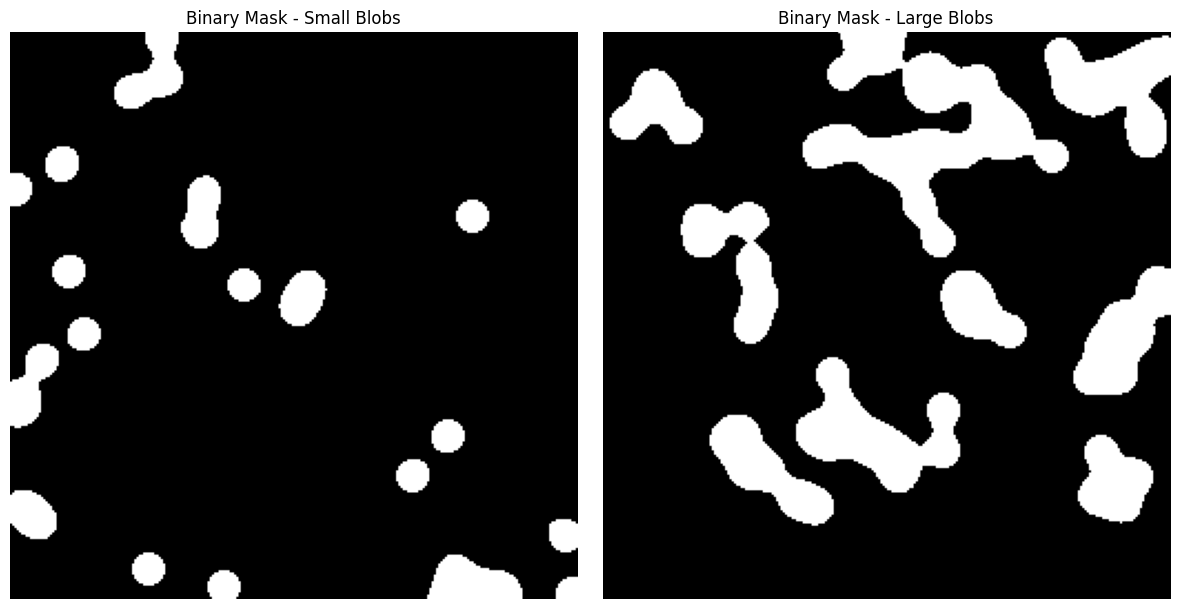

In [27]:
import numpy as np


avg_area = df['area'].mean()


small_labels = df[df['area'] < avg_area]['label'].values
large_labels = df[df['area'] >= avg_area]['label'].values

#  binary masks
small_mask = np.isin(label_image, small_labels)
large_mask = np.isin(label_image, large_labels)

# visualise maksks
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(small_mask, cmap='gray')
ax[0].set_title('Binary Mask - Small Blobs')
ax[0].axis('off')

ax[1].imshow(large_mask, cmap='gray')
ax[1].set_title('Binary Mask - Large Blobs')
ax[1].axis('off')

plt.tight_layout()
plt.show()


Representing blobs

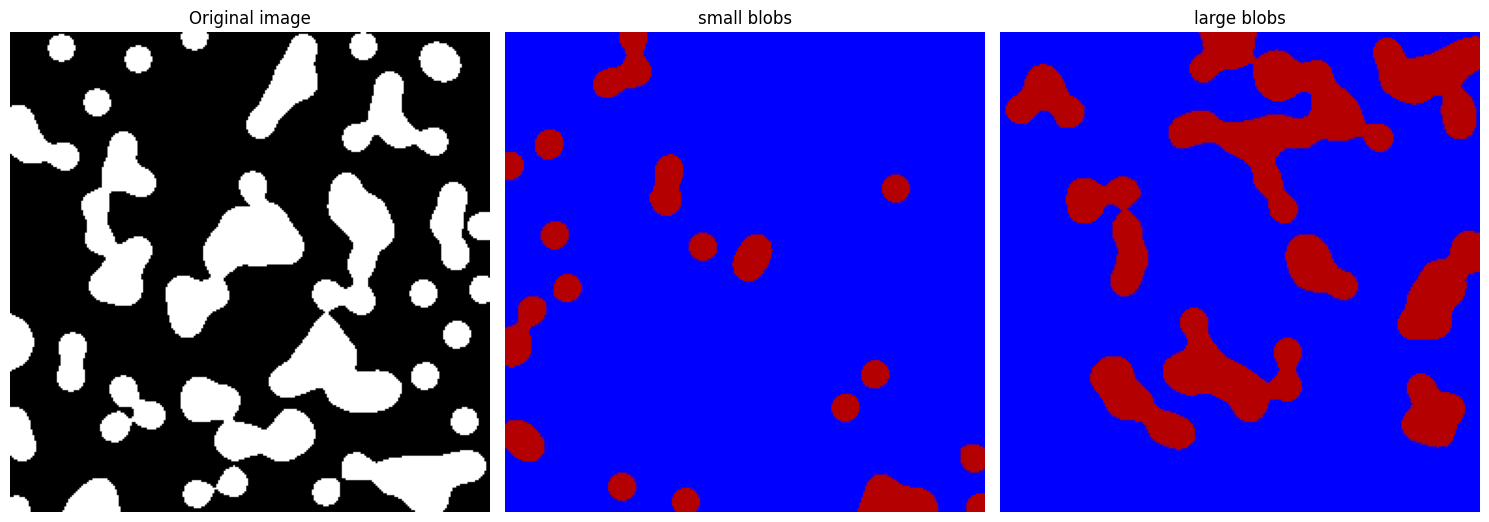

In [29]:
import numpy as np
import matplotlib.pyplot as plt

avg_area = df['area'].mean()


small_labels = df[df['area'] < avg_area]['label'].values
large_labels = df[df['area'] >= avg_area]['label'].values

#  Create masks
small_mask = np.isin(label_image, small_labels)
large_mask = np.isin(label_image, large_labels)

# Creating RGB overlays
def mask_to_colored(mask):
    colored = np.zeros((*mask.shape, 3), dtype=np.uint8)
    colored[:, :, 2] = 255              # Blue backgrond
    colored[mask, 0] = 180                   # Red blobs
    colored[mask, 2] = 0
    return colored

small_overlay = mask_to_colored(small_mask)
large_overlay = mask_to_colored(large_mask)


fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original image')
axes[0].axis('off')

axes[1].imshow(small_overlay)
axes[1].set_title('small blobs')
axes[1].axis('off')

axes[2].imshow(large_overlay)
axes[2].set_title('large blobs')
axes[2].axis('off')

plt.tight_layout()
plt.show()


# **5. Obtain texture-based regional properties**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix
from skimage.util import img_as_ubyte
from skimage.data import binary_blobs


IG = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3)
IG = img_as_ubyte(IG)


glcm = graycomatrix(IG, distances=[1], angles=[0], levels=256, symmetric=True, normed=False)

print(glcm[0:4, 0:4, 0, 0])  # print first 4x4 entries for understanding

print(f"Number of times that a grayscale level 0 has a neighbour with value 0 at a distance of 1 pixel to the right: {glcm[0, 0, 0, 0]}")
print(f"Number of times that a grayscale level 0 has a neighbour with value 1 at a distance of 1 pixel to the right: {glcm[0, 1, 0, 0]}")
print(f"Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right: {glcm[2, 2, 0, 0]}")
print(f"Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right: {glcm[2, 0, 0, 0]}")


[[89338     0     0     0]
 [    0     0     0     0]
 [    0     0     0     0]
 [    0     0     0     0]]
Number of times that a grayscale level 0 has a neighbour with value 0 at a distance of 1 pixel to the right: 89338
Number of times that a grayscale level 0 has a neighbour with value 1 at a distance of 1 pixel to the right: 0
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right: 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right: 0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage.util import img_as_ubyte
from skimage.data import binary_blobs


image = binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3)


IG = img_as_ubyte(image)


from skimage.filters import threshold_otsu
from skimage.measure import label

thresh = threshold_otsu(IG)
binary = IG > thresh
label_image = label(binary)


props = regionprops(label_image, intensity_image=IG)
nregions = len(props)


props_texture = np.zeros((nregions, 5))

for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox

    region_img = IG[minr:maxr, minc:maxc]

    # Compute GLCM
    g = graycomatrix(region_img, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)


    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]    # Extracting texture features
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# Convert to pandas DataFrame
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])


df.to_excel("Texture_features.xlsx", index=False)


df.head()


,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,2169.402985,8.507463,0.966638,0.703431,0.929456
1,2216.761364,8.693182,0.965910,0.719415,0.924161
2,2955.681818,11.590909,0.954546,0.678211,0.908476
3,5573.571429,21.857143,0.914287,0.794568,0.704734
4,5348.376623,20.974026,0.917750,0.769912,0.752069
